In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from yahoo_fin import stock_info as si

In [2]:
def get_yahoo_data():
    """
    This function gets Yahoo Finance Data based on a stock ticker and a given 
    time-frame and then saves that data as a Pandas Dataframe.
    """
    
    # Ask for user input
    while True:
        try:
            stock_ticker = str(input("Please enter the stock ticker of the stock you want to analyze: "))
            start_date = str(input("Please enter a start date for stock analysis (YYYY-DD-MM): "))
            end_date = str(input("Please enter an end date for stock analysis (YYYY-MM-DD): "))
            # Create dataframe with DataReader module
            stock_data = data.DataReader(stock_ticker, "yahoo", start_date, end_date)
            break
        
        except:
            print("Invalid format for either stock ticker or dates - please try again and ensure correct format.")
    
    
    print(f"Successfully imported stock data for ticker {stock_ticker} from {start_date} to {end_date}.")
    
    return stock_data, stock_ticker, start_date, end_date

In [3]:
stock_data, stock_ticker, start_date, end_date = get_yahoo_data()

Successfully imported stock data for ticker AAPL from 2020-01-01 to 2021-01-01.


In [8]:
len(stock_data)

253

In [16]:
stock_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,73.988464
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.269157
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.852974
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.505653
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.688072


In [17]:
import datetime as dt
n = stock_data.index[-1]
print(n)

lr_target_date = str(input("Please enter your target date you want to predict the price for (YYYY-MM-DD): "))
        
# Check if date later than the dataframe date or if in the future
if dt.datetime.strptime(lr_target_date, '%Y-%m-%d').date() < stock_data.index[-1]:
    print("not in the past!")
else:
    print("correct")

2020-12-31 00:00:00
not in the past!


In [ ]:
while True:
    try:
        lr_days = int(input("How many past days do you want to consider for the linear regression? (integer) "))
            
        # Check if number of days is between end and start date
        if stock_data.tail(lr_days)
            
        break
    
    except:
        print("Invalid input. Please enter your desired days as an integer. Desired days cannot exceed the data time period.")

In [20]:
stock_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,128.617096
2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,130.207306
2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,125.824318
2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,130.117844
2021-01-08,132.630005,130.229996,132.429993,132.050003,105158200.0,131.240921


In [5]:
stock_data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,194.000000,194.000000,194.000000,194.000000,1.940000e+02,194.000000
mean,136.727733,133.984227,135.398970,135.391959,9.065773e+07,134.923147
std,9.836204,9.878552,9.862836,9.888968,2.743375e+07,9.986703
min,120.400002,116.209999,119.029999,116.360001,4.639770e+07,115.819870
25%,127.955002,125.940002,126.974998,126.862499,7.134518e+07,126.475647
50%,135.040001,132.799995,133.810005,133.820000,8.709155e+07,133.212387
75%,146.327503,143.682499,144.432499,145.392494,1.050966e+08,145.060642
max,157.259995,154.389999,156.979996,156.690002,1.855495e+08,156.461655


In [6]:
def show_stock_price(ticker):
    """
    A program that returns the current stock price.
    """
    current_stock_price = si.get_live_price(ticker).round(2)
    print(f"Current stock price: {current_stock_price} USD")
    return current_stock_price

In [7]:
show_stock_price(stock_ticker)

Current stock price: 151.28 USD


151.28

In [8]:
stock_data.describe().Close["mean"]

95.34707487807444

In [19]:
descriptive_df = stock_data.describe().Close

In [20]:
descriptive_df['mean']

193.02612642431447

In [21]:
descriptive_df['25%']

174.3800048828125

In [22]:
descriptive_df['std']

22.995562379138097

In [10]:
def describe_stock_data(stockdata, ticker):
    """
    A program that describes the stock data, 
    providing basic descriptive statistics.
    """
    
    # Save new dataframe for descriptive statistics
    descriptive_df = stockdata.describe().Close
    
    # Get descriptive variables through indexing
    stock_des_mean = descriptive_df['mean'].round(2)
    stock_des_quart1 = descriptive_df['25%'].round(2)
    stock_des_quart2 = descriptive_df['50%'].round(2)
    stock_des_quart3 = descriptive_df['75%'].round(2)
    stock_des_stddev = descriptive_df['std'].round(2)
    stock_des_range = (stock_des_quart3 - stock_des_quart1).round(2)
    stock_des_var_coefficient = ((stock_des_stddev / stock_des_mean) * 100).round(2)
    
    # Print out / return?
    print(f"The mean closing price of stock {ticker} is {stock_des_mean}.")
    print(f"The first quartile of stock {ticker}'s closing price is {stock_des_quart1}.")
    print(f"The second quartile of stock {ticker}'s closing price is {stock_des_quart2}.")
    print(f"The third quartile of stock {ticker}'s closing price is {stock_des_quart3}.")
    print(f"That means the range is equal to {stock_des_range}.")
    print(f"The stock's closing price shows a standard deviation of {stock_des_stddev} and a variation coefficient of {stock_des_var_coefficient}")

In [11]:
describe_stock_data(stock_data, stock_ticker)

The mean closing price of stock AAPL is 95.35.
The first quartile of stock AAPL's closing price is 77.39.
The second quartile of stock AAPL's closing price is 91.63.
The third quartile of stock AAPL's closing price is 115.75.
That means the range is equal to 38.36.
The stock's closing price shows a standard deviation of 21.81 and a variation coefficient of 22.87


In [14]:
def plot_ma(stockdata, ticker, startdate, enddate):
    """
    A program that plots the ticker data over the given timeframe
    and provides moving averages based on user input.

    Args:
        stockdata: Defaults to stock_data from data_importer.py
    """
    
    # Define moving averages to plot
    while True:
        try:    
            ma1_input = int(input("Please state a first moving average to plot (in days): "))
            ma2_input = int(input("Please state a second moving average to plot (in days): "))
            break
        except: 
            print("Invalid input. Please state the desired moving average in days.")
    
    # Create matplotlib plot object        
    fig = plt.figure(figsize=(12,6))
    
    # Plot closing prices
    plt.plot(stockdata.Close, label="Closing Price")
    
    # Plot moving averages
    ma1 = stockdata.Close.rolling(ma1_input).mean()
    ma2 = stockdata.Close.rolling(ma2_input).mean()
    
    plt.plot(ma1, "g", label=f"Moving Average: {ma1_input} days.") # Plot first MA in green
    plt.plot(ma2, "r", label=f"Moving Average: {ma2_input} days.") # Plot second MA in red
    
    # Give description to axes / values
    plt.xlabel('Date')
    plt.ylabel('Closing Price in USD')
    plt.title(f"Closing price of {ticker} from {startdate} to {enddate}.")
    plt.legend(loc="upper left")
    
    # Show graph
    plt.show()

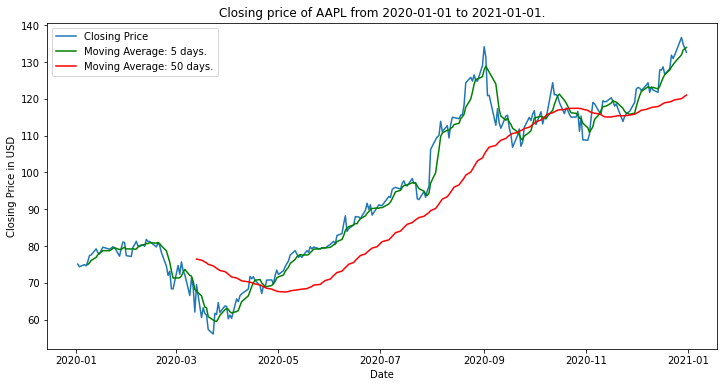

In [15]:
plot_ma(stock_data, stock_ticker, start_date, end_date)

In [27]:
import matplotlib.dates as mdates
import numpy as np

def plot_trendline(stockdata, ticker, startdate, enddate):
    """
    A program that plots the ticker data over the given timeframe
    and provides a linear trendline.

    Args:
        stockdata: Defaults to stock_data from data_importer.py
    """
    # Create matplotlib plot object        
    fig = plt.figure(figsize=(12,6))
    
    # Plot closing prices
    plt.plot(stockdata.Close, label="Closing Price")
    
    # Convert Date Axis to numerical for trend line
    numeric_dates = mdates.date2num(stockdata.index)
    
    # Create and plot trend line
    fitted_data = np.polyfit(numeric_dates, stockdata.Close, 1)
    trend_curve = np.poly1d(fitted_data)
    
    plt.plot(numeric_dates, trend_curve(numeric_dates), "y--", label="Trend Line")
    
    # Name axes and add legend
    plt.xlabel('Date')
    plt.ylabel('Closing Price in USD')
    plt.title(f"Closing price of {ticker} from {startdate} to {enddate}.")
    plt.legend(loc="upper left")

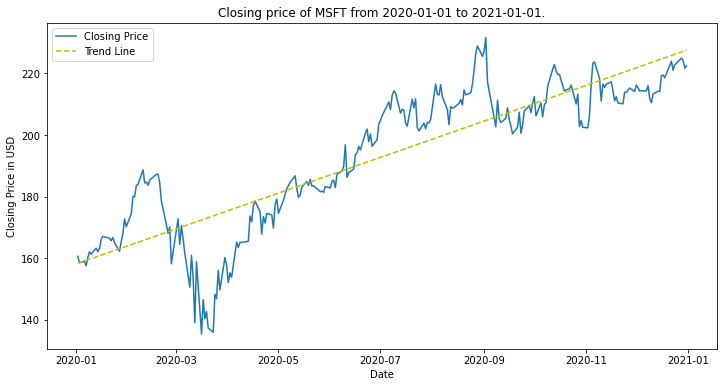

In [28]:
plot_trendline(stock_data, stock_ticker, start_date, end_date)

In [16]:
from yahoo_fin import stock_info as si
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas_ta as ta
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [19]:
def plot_macd(stockdata, ticker, startdate, enddate):
    """
    Code credit: https://www.alpharithms.com/calculate-macd-python-272222/
    This program plots the price chart combined with a moving average convergence / divergence.
    """
    # Calculate MACD values
    stockdata.ta.macd(close='Close', fast=12, slow=26, append=True)
    
    # Generate plot object
    fig = make_subplots(rows=2, cols=1, subplot_titles=[f"Candlechart: Ticker {ticker} over time.", "MACD"],)
    
    # Price Line
    fig.append_trace(go.Scatter(x=stockdata.index, y=stockdata['Open'],line=dict(color='black', width=1),
        name='Open', legendgroup='1',), row=1, col=1)

    # Candlestick chart for pricing
    fig.append_trace(go.Candlestick(x=stockdata.index, open=stockdata['Open'], high=stockdata['High'], low=stockdata['Low'],
        close=stockdata['Close'], increasing_line_color='green', decreasing_line_color='red', showlegend=False), 
        row=1, col=1)
    
    # Fast Signal (%k)
    fig.append_trace(go.Scatter(
        x=stockdata.index,
        y=stockdata['MACD_12_26_9'],
        line=dict(color='Blue', width=2),
        name='MACD',
        # showlegend=False,
        legendgroup='2',), row=2, col=1)
    
    # Slow signal (%d)
    fig.append_trace(go.Scatter(
        x=stockdata.index,
        y=stockdata['MACDs_12_26_9'],
        line=dict(color='Orange', width=2),
        # showlegend=False,
        legendgroup='2',
        name='Signal'), row=2, col=1)
    
    # Colorize the data
    colors = np.where(stockdata['MACDh_12_26_9'] < 0, 'red', 'green')
    
    fig.append_trace(go.Bar(x=stockdata.index, y=stockdata['MACDh_12_26_9'], name='Histogram', marker_color=colors), row=2, col=1)
    
    # Make it pretty
    layout = go.Layout(font_size=14, xaxis=dict(rangeslider=dict(visible=False)))
    
    # Update options and show plot
    fig.update_layout(layout)
    fig.show() 
    
    
    

In [20]:
plot_macd(stock_data, stock_ticker, start_date, end_date)

In [43]:
stock_data.head()

,High,Low,Open,Close,Volume,Adj Close,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,,,,,,,
2020-01-02,160.729996,158.330002,158.779999,160.619995,22622100.0,157.903473,NaN,NaN,NaN
2020-01-03,159.949997,158.059998,158.320007,158.619995,21116200.0,155.937286,NaN,NaN,NaN
2020-01-06,159.100006,156.509995,157.080002,159.029999,20813700.0,156.340347,NaN,NaN,NaN
2020-01-07,159.669998,157.320007,159.320007,157.580002,21634100.0,154.914886,NaN,NaN,NaN
2020-01-08,160.800003,157.949997,158.929993,160.089996,27746500.0,157.382431,NaN,NaN,NaN


In [8]:
ma_weights

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [171]:
stock_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,128.617096
2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,130.207306
2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,125.824318
2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,130.117844
2021-01-08,132.630005,130.229996,132.429993,132.050003,105158200.0,131.240921


In [34]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
import datetime as dt
import statsmodels.api as sm

In [35]:
new_df = stock_data.tail(80)

In [36]:
new_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-17,132.550003,129.649994,129.800003,131.789993,96721700.0,131.401062
2021-06-18,131.509995,130.240005,130.710007,130.460007,108953300.0,130.074997
2021-06-21,132.410004,129.210007,130.300003,132.300003,79663300.0,131.909561
2021-06-22,134.080002,131.619995,132.130005,133.979996,74783600.0,133.584595
2021-06-23,134.320007,133.229996,133.770004,133.699997,60214200.0,133.305435
...,...,...,...,...,...,...
2021-10-04,142.210007,138.270004,141.759995,139.139999,98322000.0,138.937225
2021-10-05,142.240005,139.360001,139.490005,141.110001,80861100.0,140.904358
2021-10-06,142.149994,138.369995,139.470001,142.000000,83221100.0,141.793060


In [37]:
# Change datetime to numerical for linear regression and define X & Y
lr_X = np.asarray(new_df.index.map(dt.datetime.toordinal))
lr_Y = np.asarray(new_df.Close)
        
# Reshape Data into Numpy Array
lr_X = lr_X.reshape(-1,1)
r_Y = lr_Y.reshape(-1,1)

# Create statsmodels LR object and add lr_X
x = sm.add_constant(lr_X)
        
# Predict Results
results = sm.OLS(lr_Y,x).fit()
        
# Give summary of linear regression
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     22.92
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           7.88e-06
Time:                        17:01:18   Log-Likelihood:                -241.42
No. Observations:                  80   AIC:                             486.8
Df Residuals:                      78   BIC:                             491.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.955e+04   1.25e+04     -4.776      0.000   -8.44e+04   -3.47e+04
x1             0.0809      0.017      4.787      0.000       0.047       0.115
==============================================================================
Omnibus:                        8.887   Durbin-Watson:                   0.134
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                4.935
Skew:                          -0.417   Prob(JB):                       0.0848
Kurtosis:                       2.114   Cond. No.                     1.64e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
results.summary2().tables[0][3][0]

'0.217'

In [236]:
results.summary2().tables[1]["Coef."]

const   -59551.769048
x1           0.080888
Name: Coef., dtype: float64

In [237]:
lr_slope = results.summary2().tables[1]["Coef."][1] # to get slope coefficient
lr_intercept = results.summary2().tables[1]["Coef."][0] # to get slope coefficient

In [238]:
lr_line = lr_X * lr_slope + lr_intercept

In [239]:
# Make a prediction for a given day and visualize it
sample_date = "2021-12-20"

d = datetime.datetime.strptime(sample_date, '%Y-%m-%d').date()

d = d.toordinal()
d

lr_X = np.append(lr_X, d)
lr_Y = np.append(lr_Y, (d*lr_slope + lr_intercept))

print(lr_Y.shape)
print(lr_X.shape)

(81,)
(81,)


In [240]:
lr_X.shape[0]

81

In [192]:
import datetime
import numpy as np

new = lr_X.reshape(1, 81)

l = new[0].tolist()

dates = []

for number in l:
    newnum = datetime.date.fromordinal(number)
    dates.append(newnum)

lr_line = lr_X * lr_slope + lr_intercept

len(dates)


155.53961295394402

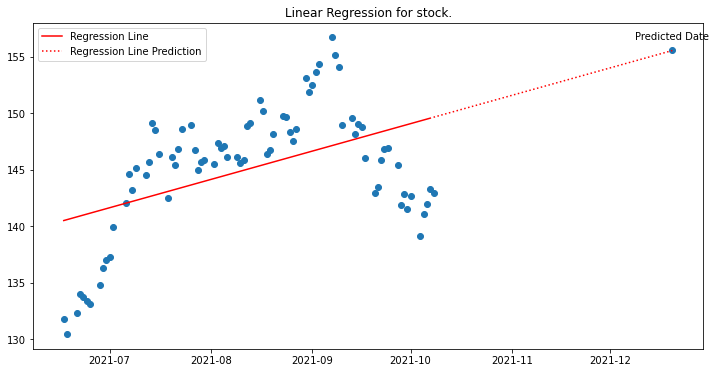

In [231]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12,6))

plt.plot(dates[:-2], lr_line[:-2], color='red', label="Regression Line")
plt.plot(dates[-2:], lr_line[-2:], color='red', linestyle="dotted", label="Regression Line Prediction")
plt.scatter(dates, lr_Y)
plt.locator_params(axis='y', nbins=10)

# plt.xlim([dates[1], dates[-1]])


plt.title(f"Linear Regression for stock.")
plt.legend(loc="upper left")
plt.text(dates[-1],(lr_line[-1]+1), "Predicted Date",ha='center')
plt.show()

In [1]:
help(plt.text)

NameError: name 'plt' is not defined

In [2]:
# html parser
from bs4 import BeautifulSoup
# web scraper
import requests
# regex to search for strings on sites
import re

In [3]:
URL = f"https://money.cnn.com/quote/forecast/forecast.html?symb=AAPL"
page = requests.get(URL)

# Parse the website with beautifulsoup
soup = BeautifulSoup(page.content, "html.parser")

In [8]:
#<span class="Trsdu(0.3s) Fw(500) Pstart(10px) Fz(24px) C($negativeColor)" data-reactid="30">-2.89 (-1.92%)</span>
    
td_change_intraday = soup.body.find_all('span', {'data-reactid':"30"}) 
td_change_intraday

[]

In [12]:
mytuple = (1,2,3,4)

a = mytuple

In [13]:
a

(1, 2, 3, 4)

In [14]:
new_df

NameError: name 'new_df' is not defined

In [21]:
stock_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,128.617096
2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,130.207306
2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,125.824318
2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,130.117844
2021-01-08,132.630005,130.229996,132.429993,132.050003,105158200.0,131.240921
...,...,...,...,...,...,...
2021-10-04,142.210007,138.270004,141.759995,139.139999,98322000.0,138.937225
2021-10-05,142.240005,139.360001,139.490005,141.110001,80861100.0,140.904358
2021-10-06,142.149994,138.369995,139.470001,142.000000,83221100.0,141.793060


In [28]:
from bs4 import BeautifulSoup
# web scraper
import requests
# regex to search for strings on sites
import re

In [29]:
URL = f"https://money.cnn.com/quote/forecast/forecast.html?symb=AAPL"
page = requests.get(URL)

# Parse the website with beautifulsoup
soup = BeautifulSoup(page.content, "html.parser")

soup

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">

<html>
<head>
<meta content="IE=Edge" http-equiv="x-ua-compatible"/>
<meta content="no-cache" http-equiv="Pragma"/>
<title>AAPL - Apple Inc Forecast - CNNMoney.com</title>
<link href="//z.cdn.turner.com/money/.e/ssi/css/2.0/pkg/wsod.quotes/1664.css" rel="stylesheet" type="text/css"/>
<link href="//money.cnn.com/quote/quote.html?symb=AAPL" rel="canonical"/>
<!-- prod/stage version -->
<script src="//cdn.cnn.com/ads/adfuel/ais/2.1/cnn_money-ais.min.js" type="text/javascript"></script>
<script src="//cdn.cnn.com/ads/adfuel/adfuel-2.1.min.js" type="text/javascript"></script>
<!-- <script type="text/javascript" src="//lightning.cnn.com/launch/7be62238e4c3/3acce89e7125/launch-95f9268404e1.min.js"></script> -->
<script src="//cdn.cnn.com/analytics/mon/jsmd-prod.min.js" type="text/javascript"></script>
<script>
var CNNBUSINESS = window.CNNBUSINESS || {};
CNNBUSINESS.adTargets = {};

if(document.referrer.match("edition|us|www.cnn.

In [30]:
# Get the Market Watch website for a given stock ticker
URL = f"https://finance.yahoo.com/quote/AAPL"
page = requests.get(URL)

# Parse the website with beautifulsoup
soup = BeautifulSoup(page.content, "html.parser")

In [31]:
# <span class="Trsdu(0.3s) Fw(500) Pstart(10px) Fz(24px) C($positiveColor)" data-reactid="30">+0.46 (+0.31%)</span>
# <div class="D(ib) Mend(20px)" data-reactid="28"><span class="Trsdu(0.3s) Fw(b) Fz(36px) Mb(-4px) D(ib)" data-reactid="29">148.42</span><span class="Trsdu(0.3s) Fw(500) Pstart(10px) Fz(24px) C($positiveColor)" data-reactid="30">+0.50 (+0.34%)</span><div id="quote-market-notice" class="C($tertiaryColor) D(b) Fz(12px) Fw(n) Mstart(0)--mobpsm Mt(6px)--mobpsm" data-reactid="31"><span data-reactid="32">As of  10:28AM EST. Market open.</span></div></div>

<!DOCTYPE html>
<html class="NoJs chrome desktop failsafe" id="atomic" lang="en-US"><head prefix="og: http://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark('PageStart');</script><meta charset="utf-8"/><title>Apple Inc. (AAPL) Stock Price, News, Quote &amp; History - Yahoo Finance</title><meta content="AAPL, Apple Inc., AAPL stock chart, Apple Inc. stock chart, stock chart, stocks, quotes, finance" name="keywords"/><meta content="on" http-equiv="x-dns-prefetch-control"/><meta content="on" property="twitter:dnt"/><meta content="458584288257241" property="fb:app_id"/><meta content="#400090" name="theme-color"/><meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="Find the latest Apple Inc. (AAPL) stock quote, history, news and other vital information to help you with your stock trading and investing." lang="en-US" name="description"/><meta content="guce.yahoo.com" name="oath:guce:consent-host"/><meta content="A986

In [33]:
td_change_intraday = soup.body.find_all('div', {'class':["D(ib) Mend(20px) data-reactid=28"]}) 
td_change_intraday

[]

In [46]:
URL = f"https://finance.yahoo.com/quote/TSLA"
page = requests.get(URL)

# Parse the website with beautifulsoup
soup = BeautifulSoup(page.content, "html.parser")

In [51]:
eps = soup.body.find_all("td", {'data-test':"PE_RATIO-value"})
actual_eps = re.findall("\d+\.\d+", str(eps[0]))[1]
actual_eps

'350.86'